In [124]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/Iowa_housing_dataset.csv'

In [69]:
data = pd.read_csv(path)

sample_size = 50

z_critical = stats.norm.ppf(q=0.99)

data_sample = data.sample(n = sample_size, random_state = 0)

sample_mean = np.mean(data_sample['SalePrice'])

population_std = data['SalePrice'].std() #np.std(data['SalePrice'])

margin_of_error = z_critical * population_std / (math.sqrt(sample_size))

margin_of_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(confidence_interval)

true_mean = np.mean(data['SalePrice'])

(172456.61596474273, 225021.30403525726)


In [70]:
data['SalePrice'].std(), population_std

(79886.69235666493, 79886.69235666493)

In [71]:
z_statistic, p_value = ztest(data['Lot.Area'], value = 1200, alternative = 'smaller')

z_statistic, p_value

if p_value >= 0.005 :
    inference = 'Accept'
else :
    inference = 'Reject'

print(inference)

Accept


In [72]:
data['Sale.Condition'].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [73]:
family = data[data['Sale.Condition'] == 'Family']['SalePrice']

alloca = data[data['Sale.Condition'] == 'Alloca']['SalePrice']

t_stat, p_value = scipy.stats.mstats.ttest_ind(family, alloca)

print(t_stat, p_value)

if p_value >= 0.005 :
    inference = 'Accept'
else :
    inference = 'Reject'

print(inference)



-0.2600957325150498 0.7955758684627952
Accept


In [74]:
observed = pd.DataFrame({'High School': [60, 40], 'Bachelors' : [54, 44], 'Masters' : [46, 53], 'Ph.d.' : [41, 57]}, 
                     index = ['Female', 'Male'])

expected = pd.DataFrame({'High School': [50.886, 49.114], 'Bachelors' : [49.868, 48.132], 'Masters' : [50.377, 48.623], 'Ph.d.' : [49.868, 48.132]}, 
                     index = ['Female', 'Male'])

In [75]:
chi2, p= stats.chisquare(f_obs= observed, f_exp= expected)

print("Chi-square statistic = ",chi2)
print("p-value = ",p)

Chi-square statistic =  [3.32364346 0.69709319 0.77430887 3.2108616 ]
p-value =  [0.06829033 0.40376215 0.37888736 0.07315095]


In [76]:
help(stats.chisquare(f_obs= observed, f_exp= expected))

Help on Power_divergenceResult in module scipy.stats.stats object:

class Power_divergenceResult(builtins.tuple)
 |  Power_divergenceResult(statistic, pvalue)
 |  
 |  Power_divergenceResult(statistic, pvalue)
 |  
 |  Method resolution order:
 |      Power_divergenceResult
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new OrderedDict which maps field names to their values.
 |  
 |  _replace(_self, **kwds)
 |      Return a new Power_divergenceResult object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(iterable) from builtins.type
 |      Make a new Power_divergenceResult object from a sequence or iterable
 |  
 |  --------

In [77]:
(43500-42000)/(3000/np.sqrt(30))

2.7386127875258306

In [78]:
(68-71)/(7.5/6)

-2.4

# INFERENTIAL STATISTICS ASSESSMENT

In [79]:
sample_size=2000

#Z_Critical Score
z_critical = stats.norm.ppf(q = 0.95)
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/cleaned_loan_data.csv'

In [80]:
data = pd.read_csv(path)

data_sample = data.sample(n = sample_size, random_state=0)

sample_mean, sample_std = data_sample['installment'].mean(), data_sample['installment'].std()

data_sample.describe()

margin_of_error = z_critical * sample_std / (math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

true_mean = data['installment'].mean()

confidence_interval, true_mean

confidence_interval[0] <= true_mean <= confidence_interval[1]

True

In [81]:
sample_size=np.array([20,50,100])

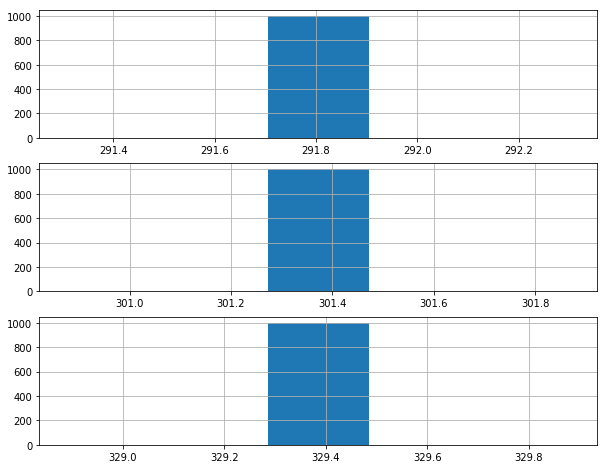

In [95]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))
for i in range(len(sample_size)):
    m = []
    for j in range(1000) :
        sample_data = data.sample(n = sample_size[i], random_state=0)
        m.append(sample_data['installment'].mean())
    mean_series = pd.Series(data= m)
    mean_series.hist(bins = 5, ax = axes[i])
        

In [96]:
data.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [101]:
data['int.rate'] = data['int.rate'].str.replace('%', '').astype(float)

data['int.rate'] = data['int.rate'] / 100

z_statistic, p_value = ztest(x1 = data[data['purpose'] == 'small_business']['int.rate'], value = data['int.rate'].mean(),
                            alternative='larger')

z_statistic, p_value

if p_value < 0.05 :
    print('Null Hypothesis rejected')
else :
    print('Null Hypothesis accepted')

In [123]:
installment_loan_defaulters = data[data['paid.back.loan'] == 'No']['installment']

installment_loan_payers = data[data['paid.back.loan'] == 'Yes']['installment']

z_statistic, p_value = ztest(x1 = installment_loan_defaulters, x2 = installment_loan_payers)

print(z_statistic, p_value)

if p_value < 0.05 :
    print('Null Hypothesis rejected')
else :
    print('Null Hypothesis accepted')

4.894575287952092 9.85182562491764e-07
Null Hypothesis rejected


In [125]:
#Critical value
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories(in purpose) - 1

In [140]:
yes = data[data['paid.back.loan'] == 'Yes']['purpose'].value_counts()

no = data[data['paid.back.loan'] == 'No']['purpose'].value_counts()

observed = pd.concat([yes.transpose(), no.transpose()], axis=1, keys = ['Yes', 'No'], sort=True)

chi2, p, dof, ex = chi2_contingency(observed)

if chi2 > critical_value :
    print('Reject Null Hypothesis')
else :
    print('Accept Null Hypothesis')

Reject Null Hypothesis


In [146]:
sample_size = 1000

z_critical = stats.norm.ppf(q=0.95)

data_sample = data.sample(n = sample_size, random_state = 0)

sample_mean = 180 #np.mean(data_sample['SalePrice'])

population_std = 30 #0.4 #data['SalePrice'].std() #np.std(data['SalePrice'])

margin_of_error = z_critical * population_std / (math.sqrt(sample_size))

margin_of_error

1.560445163626672

In [145]:
z_critical

1.6448536269514722